Librerias

In [36]:
import matplotlib.pyplot as plt

Df con Query SQL

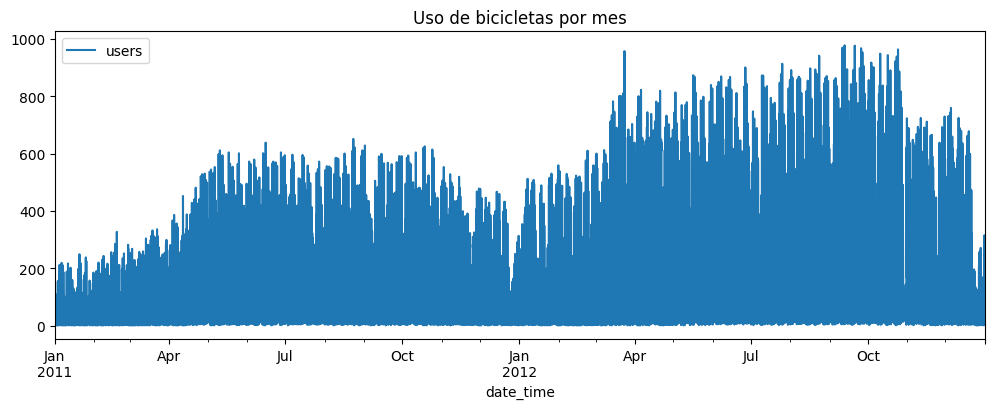

In [1]:
import sys
sys.path.append('../src')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from database import read_data_sql

query = """
SELECT *
FROM bike_sharing
ORDER BY date_time
"""
df = read_data_sql(query)

# 1. Parseo de fechas
df["date_time"] = pd.to_datetime(df["date_time"])
df = df.set_index("date_time").sort_index()

df[["users"]].plot(figsize=(12, 4))
plt.title("Uso de bicicletas por mes") #En realidad están los datos de cada hora pero gráficamente se etiqueta mensual
plt.show()

Resampleo de datos diario

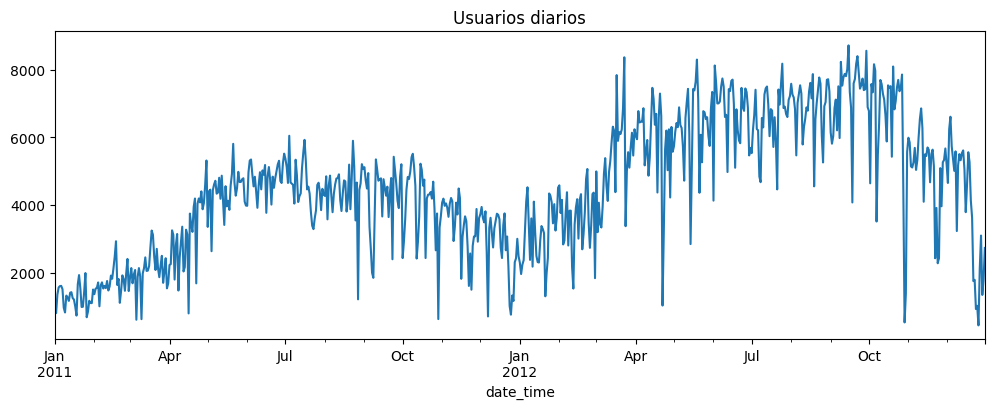

In [3]:
df_daily = df["users"].resample("D").sum()
df_daily.plot(figsize=(12,4))
plt.title("Usuarios diarios")
plt.show()

In [11]:
df.head(2)

,holiday,workingday,weather,temp,atemp,hum,windspeed,users,month,hour,weekday
date_time,,,,,,,,,,,
2011-01-01 00:00:00,0.0,0.0,clear,9.84,14.395,81.0,0.0,16.0,1,0,5
2011-01-01 01:00:00,0.0,0.0,clear,9.02,13.635,80.0,0.0,40.0,1,1,5


In [60]:
df["hour"].value_counts().sort_index(ascending=True)

hour
0     731
1     731
2     731
3     731
4     731
5     731
6     731
7     731
8     731
9     731
10    731
11    731
12    731
13    731
14    731
15    731
16    731
17    731
18    731
19    731
20    731
21    731
22    731
23    731
Name: count, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17544 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   holiday     17544 non-null  float64
 1   workingday  17544 non-null  float64
 2   weather     17544 non-null  object 
 3   temp        17544 non-null  float64
 4   atemp       17544 non-null  float64
 5   hum         17544 non-null  float64
 6   windspeed   17544 non-null  float64
 7   users       17544 non-null  float64
 8   month       17544 non-null  int64  
 9   hour        17544 non-null  int64  
 10  weekday     17544 non-null  int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 1.6+ MB


In [33]:
df.columns

Index(['holiday', 'workingday', 'weather', 'temp', 'atemp', 'hum', 'windspeed',
       'users', 'month', 'hour', 'weekday'],
      dtype='object')

Graficos de barras ("unique")

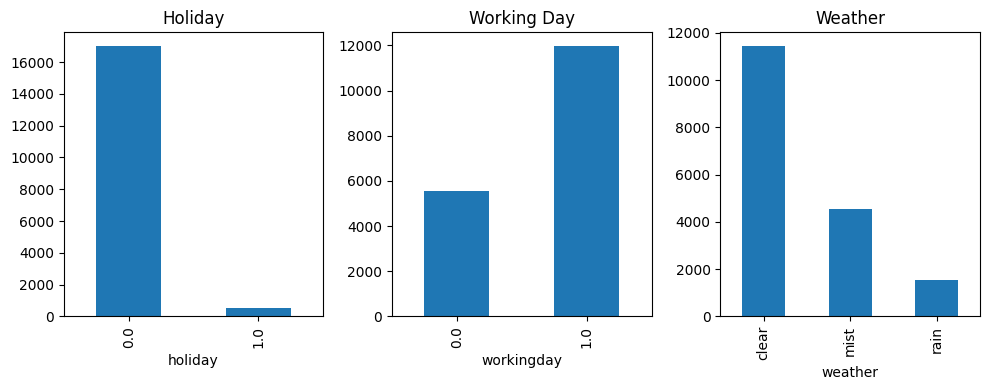

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
axes = axes.flatten()

plots = [
    lambda ax: df["holiday"].value_counts().sort_index().plot(kind="bar", ax=ax, title="Holiday"),
    lambda ax: df["workingday"].value_counts().sort_index().plot(kind="bar", ax=ax, title="Working Day"),
    lambda ax: df["weather"].value_counts().sort_index().plot(kind="bar", ax=ax, title="Weather"),
    # lambda ax: df["month"].value_counts().sort_index().plot(kind="bar", ax=ax, title="Month"),
    # lambda ax: df["hour"].value_counts().sort_index().plot(kind="bar", ax=ax, title="Hour"),
    # lambda ax: df["weekday"].value_counts().sort_index().plot(kind="bar", ax=ax, title="Weekday"),
    ]

for ax, plot_fn in zip(axes, plots):
    plot_fn(ax)

# Ocultar ejes vacíos
for ax in axes[len(plots):]:
    ax.axis("off")

plt.tight_layout()
plt.show()

Graficos de histograma ("frecuencia")

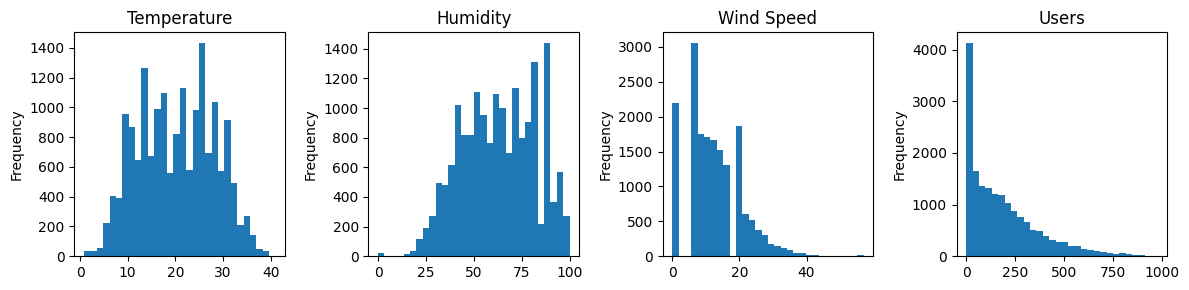

In [52]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
axes = axes.flatten()

plots = [
    lambda ax: df["temp"].plot(kind="hist", bins=30, ax=ax, title="Temperature"),
    lambda ax: df["hum"].plot(kind="hist", bins=30, ax=ax, title="Humidity"),
    lambda ax: df["windspeed"].plot(kind="hist", bins=30, ax=ax, title="Wind Speed"),
    lambda ax: df["users"].plot(kind="hist", bins=30, ax=ax, title="Users"),
]

for ax, plot_fn in zip(axes, plots):
    plot_fn(ax)

# Ocultar ejes vacíos
for ax in axes[len(plots):]:
    ax.axis("off")

plt.tight_layout()
plt.show()

weekday           0           1           2           3           4  \
hour                                                                  
0         34.009524   27.096154   34.557692   39.144231   52.432692   
1         17.352381   12.403846   15.336538   17.307692   24.721154   
2         10.180952    6.875000    7.778846    9.269231   12.740385   
3          5.266667    4.307692    4.875000    5.211538    6.509615   
4          5.780952    5.201923    4.836538    5.365385    5.807692   
5         21.657143   24.019231   25.750000   25.913462   23.903846   
6         85.257143  104.701923  107.807692  106.653846   90.028846   
7        246.380952  294.182692  303.980769  302.057692  254.326923   
8        408.476190  462.961538  488.326923  484.125000  462.278846   
9        216.571429  232.153846  238.528846  238.807692  258.990385   
10       137.914286  126.990385  131.894231  131.538462  157.730769   
11       162.342857  143.750000  152.201923  157.557692  188.115385   
12    

<Axes: xlabel='hour'>

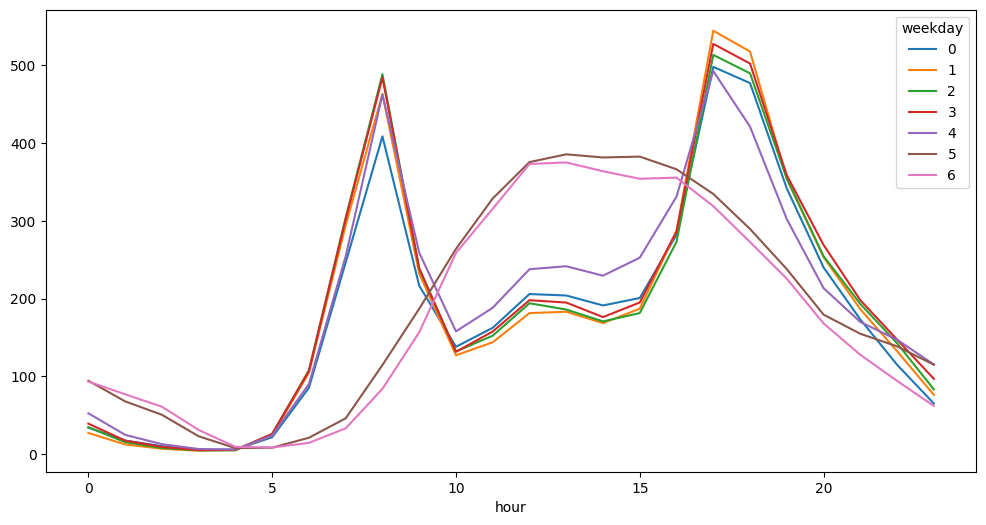

In [63]:
print(pd.pivot_table(df, values="users", index="hour", columns="weekday"))
pd.pivot_table(df, values="users", index="hour", columns="weekday").plot(figsize=(12, 6))